# 서울지하철 복잡도 분석
## 데이터 설명
- 데이터 : 
    - https://www.data.go.kr/tcs/dss/selectFileDataDetailView.do?publicDataPk=15071311 [공공데이터포털 - 서울교통공사_지하철혼잡도정보]

- 데이터 설명 : 
    - 서울교통공사 1-8호선 30분 단위 평균 혼잡도로 30분간 지나는 열차들의 평균 혼잡도(정원대비 승차인원으로, 승차인과 좌석수가 일치할 경우를 혼잡도 34%로 산정) 입니다.(단위: %). 서울교통공사 혼잡도 데이터는 조사일자(평일, 토요일, 일요일), 호선, 역번호, 역명, 상하선구분, 30분단위 별 혼잡도 데이터로 구성되어 있습니다. (2년 단위 업데이트 자료 입니다.)

## 프로젝트 기획 및 배경
- 서울 대한민국의 인구밀도는 1km 제곱당 15,699명이 살고 있음을 통계를 통해 확인할 수 있다. (참고 : https://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1007
: 지역별 인구 및 인구밀도 [2021년 기준]) 상황이 이렇다보니, 인구들이 이동하기 위한 교통수단의 밀집도도 상당할것으로 예상을 한다. 따라서 서울지하철의 복잡도 데이터를 통해 시간별, 역별, 호선별 복잡도를 분석해보고자 한다.

## 프로젝트 내용

1. 개발환경
    - jupyter notebook을 통해 프로젝트 진행
2. 데이터 불러오기
    - '공공데이터포털 - 서울교통공사_지하철혼잡도정보' csv 파일을 활용하였습니다.
3. 데이터 전처리
    - 시간별, 역별, 호선별로 reshape을 통해 데이터 모양을 변경하여, 원하는 결과를 얻을 수 있도록 하였습니다.
4. 데이터 시각화
    - 111
5. 모델 설정
6. 학습
7. 발전 가능성


## 수치형 자료
1. 역명에 따른 복잡도
2. 호선에 따른 복잡도
3. 요일에 따른 복잡도
4. 역번호 drop
5. 시간에 따른 복잡도
6. 상선, 하선, 내선, 외선에 따른 복잡도?

## 환경설정

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc

# jupyter notebook에서 한글 깨짐 현상으로 한글폰트 적용
rc('font', family='Malgun Gothic')

## 데이터 불러오기

In [2]:
# pandas를 사용하여 dataframe 형태로 불러옵니다.
data = pd.read_csv("G:/DeepLearning/개인 훈련 자료/서울교통공사_지하철혼잡도정보_20211231.csv", encoding='CP949')

In [3]:
# 데이터가 정상적으로 출력되는지 확인하기 위해 상위 5개의 데이터 샘플을 출력
data.head()

,연번,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
0,1,평일,1,150,서울역,상선,6.2,14.6,13.4,26.8,...,20.0,15.1,11.1,12.0,12.5,10.1,10.4,16.4,7.8,6.1
1,2,평일,1,150,서울역,하선,9.1,8.6,9.3,15.2,...,37.5,26.5,25.5,26.4,26.3,21.1,32.1,20.3,12.6,10.3
2,3,평일,1,151,시청,상선,5.4,10.1,13.0,20.8,...,24.1,17.4,13.7,14.5,15.8,12.1,14.5,18.3,11.7,11.7
3,4,평일,1,151,시청,하선,7.0,6.8,10.2,14.5,...,33.8,22.9,22.0,24.1,23.0,21.0,24.8,18.5,11.8,9.1
4,5,평일,1,152,종각,상선,5.2,10.8,9.3,13.6,...,28.8,20.2,19.1,18.7,22.2,16.1,21.8,25.1,16.3,14.8


In [4]:
# dataframe의 정보를 요약해서 출력 - 해당 데이터는 결측값이 없는것으로 확인
data.info()
# 데이터 모양 확인
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      1704 non-null   int64  
 1   조사일자    1704 non-null   object 
 2   호선      1704 non-null   int64  
 3   역번호     1704 non-null   int64  
 4   역명      1704 non-null   object 
 5   구분      1704 non-null   object 
 6   5시30분   1704 non-null   float64
 7   6시00분   1704 non-null   float64
 8   6시30분   1704 non-null   float64
 9   7시00분   1704 non-null   float64
 10  7시30분   1704 non-null   float64
 11  8시00분   1704 non-null   float64
 12  8시30분   1704 non-null   float64
 13  9시00분   1704 non-null   float64
 14  9시30분   1704 non-null   float64
 15  10시00분  1704 non-null   float64
 16  10시30분  1704 non-null   float64
 17  11시00분  1704 non-null   float64
 18  11시30분  1704 non-null   float64
 19  12시00분  1704 non-null   float64
 20  12시30분  1704 non-null   float64
 21  13시00분  1704 non-null   float64
 22  

(1704, 43)

In [5]:
# describe를 통해 수치형 변수의 데이터 정보를 요약하여 출력합니다.
# mean은 평균, std는 표준편차를 나타냅니다. 
# 해당 요약 정보는 지하철 전체 시간별 요약 정보입니다.
data.describe()

,연번,호선,역번호,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
count,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,...,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000
mean,852.500000,5.235915,1645.390845,12.829049,12.454460,12.589847,15.340728,19.757512,27.309096,24.065669,...,24.104695,19.591256,18.273768,18.359624,19.310739,17.816960,19.857570,18.593721,16.009918,10.993310
std,492.046746,2.889140,1171.787868,11.507665,8.893017,10.275193,14.774740,19.332359,26.940089,22.153565,...,16.326942,12.262688,11.036071,11.546144,12.532676,11.869515,14.141485,13.658437,11.925547,9.449757
min,1.000000,1.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,426.750000,3.000000,318.750000,5.600000,6.500000,5.875000,6.275000,7.300000,10.800000,10.800000,...,13.400000,11.300000,10.300000,9.800000,10.000000,9.200000,9.900000,8.800000,7.300000,4.100000
50%,852.500000,5.000000,2531.500000,9.700000,10.300000,9.700000,10.150000,12.650000,17.700000,16.600000,...,21.400000,17.700000,16.900000,16.400000,17.400000,15.900000,16.850000,14.900000,13.000000,8.700000
75%,1278.250000,7.000000,2646.250000,16.500000,16.100000,15.925000,18.500000,24.800000,33.025000,28.800000,...,30.425000,24.900000,24.200000,25.000000,26.100000,24.100000,27.100000,25.825000,22.600000,15.300000
max,1704.000000,15.000000,2827.000000,89.000000,56.500000,66.800000,93.400000,107.900000,150.800000,149.400000,...,94.500000,70.400000,61.700000,63.800000,71.900000,78.600000,95.300000,91.800000,79.500000,72.500000


문득 출근시간인 '8시00분'를 기준으로 어떤역이 가장 복잡도가 높은지 확인을 해보고 싶었다.
그래서 아래의 코드를 통해 해당 데이터를 확인할 수 있었다.

In [21]:
# 모든 컬럼의 확인을 위해 옵션 설정
pd.set_option('display.max_columns',None)
# 데이터 중 출근시간인 8시에 어떤 역에서 복잡도가 가장 높은지 확인
data[['8시00분','역명','구분','호선','조사일자']].sort_values(by='8시00분', ascending=False).head(10)

,8시00분,역명,구분,호선,조사일자
211,150.8,한성대입구,하선,4,평일
209,150.6,성신여대입구,하선,4,평일
213,141.6,혜화,하선,4,평일
207,140.6,길음,하선,4,평일
135,140.6,무악재,하선,3,평일
133,138.9,홍제,하선,3,평일
137,137.5,독립문,하선,3,평일
71,135.6,사당,외선,2,평일
539,134.1,강동구청,하선,8,평일
205,133.7,미아삼거리,하선,4,평일


수집한 데이터를 어떻게 전처리를 해야될지 고민을 했습니다. 일단 '서울역'을 기준으로 '7시30분 ~ 9시30분'까지의 데이터를 확인해보았습니다.

In [59]:
# 서울역 출퇴근길 데이터 (전처리 전)
data.loc[data_station_name['역명'] == '서울역' ,['역명','호선','조사일자','구분','7시30분','8시00분','8시30분','9시00분','9시30분']]

,역명,호선,조사일자,구분,7시30분,8시00분,8시30분,9시00분,9시30분
0,서울역,1,평일,상선,43.3,53.6,70.9,40.4,38.0
1,서울역,1,평일,하선,29.3,27.7,19.0,18.5,15.1
224,서울역,4,평일,상선,25.3,43.0,47.4,35.2,33.2
225,서울역,4,평일,하선,17.5,23.8,24.9,16.3,17.9
568,서울역,1,토요일,상선,10.0,20.4,19.3,21.0,25.9
569,서울역,1,토요일,하선,7.6,11.7,11.1,14.8,15.1
792,서울역,4,토요일,상선,14.1,23.7,24.4,28.9,28.8
793,서울역,4,토요일,하선,9.9,11.4,14.0,16.2,18.1
1136,서울역,1,일요일,상선,7.5,14.1,12.8,14.6,18.9
1137,서울역,1,일요일,하선,4.5,7.9,7.2,10.5,11.5


위의 데이터를 통해 '평일 - 4호선 - 한성대입구 - 하선'에서 150.8%로 가장 복잡한것을 확인할 수 있었다.

## 데이터 사전처리

In [25]:
# 필요 없는 변수 '역번호','연번' 제거
data_clean = data.drop(columns = ['역번호', '연번'], axis = 1).copy()

In [26]:
# 5개의 데이터 샘플을 출력합니다.
data_clean.head()

,조사일자,호선,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,10시00분,10시30분,11시00분,11시30분,12시00분,12시30분,13시00분,13시30분,14시00분,14시30분,15시00분,15시30분,16시00분,16시30분,17시00분,17시30분,18시00분,18시30분,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
0,평일,1,서울역,상선,6.2,14.6,13.4,26.8,43.3,53.6,70.9,40.4,38.0,26.6,23.4,22.4,22.1,21.5,27.2,21.2,24.1,21.7,18.7,18.5,18.4,16.4,17.7,16.7,24.1,30.8,28.7,20.0,15.1,11.1,12.0,12.5,10.1,10.4,16.4,7.8,6.1
1,평일,1,서울역,하선,9.1,8.6,9.3,15.2,29.3,27.7,19.0,18.5,15.1,13.9,15.2,14.6,14.2,17.6,19.6,20.3,20.5,25.4,22.0,30.1,24.4,33.8,36.7,43.8,49.7,84.0,65.1,37.5,26.5,25.5,26.4,26.3,21.1,32.1,20.3,12.6,10.3
2,평일,1,시청,상선,5.4,10.1,13.0,20.8,32.0,40.6,50.9,30.8,35.8,20.2,21.9,20.8,20.0,21.7,24.4,21.7,23.7,21.5,20.7,20.3,19.3,18.0,19.4,18.7,26.5,41.5,35.6,24.1,17.4,13.7,14.5,15.8,12.1,14.5,18.3,11.7,11.7
3,평일,1,시청,하선,7.0,6.8,10.2,14.5,27.0,24.7,20.0,18.4,14.5,13.5,14.2,13.7,13.2,17.3,18.4,19.6,19.4,24.2,22.9,27.0,26.4,30.6,30.5,41.1,45.3,81.2,59.2,33.8,22.9,22.0,24.1,23.0,21.0,24.8,18.5,11.8,9.1
4,평일,1,종각,상선,5.2,10.8,9.3,13.6,19.6,25.5,26.5,19.2,26.2,17.0,18.4,19.4,16.9,21.2,23.2,21.0,22.8,23.8,21.0,23.7,22.3,20.6,21.0,24.1,29.1,54.5,42.0,28.8,20.2,19.1,18.7,22.2,16.1,21.8,25.1,16.3,14.8


### 역명별 데이터 분석
- 호선, 시간, 조사일자, 구분 상관없이, 데이터 전체 역명별 복잡도 확인

In [33]:
# 필요없는 컬럼 '조사일자','호선',구분' 제거
data_station_name = data_clean.drop(columns = ['조사일자','호선','구분'], axis = 1).copy()
data_station_name.head()

,역명,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,10시00분,10시30분,11시00분,11시30분,12시00분,12시30분,13시00분,13시30분,14시00분,14시30분,15시00분,15시30분,16시00분,16시30분,17시00분,17시30분,18시00분,18시30분,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
0,서울역,6.2,14.6,13.4,26.8,43.3,53.6,70.9,40.4,38.0,26.6,23.4,22.4,22.1,21.5,27.2,21.2,24.1,21.7,18.7,18.5,18.4,16.4,17.7,16.7,24.1,30.8,28.7,20.0,15.1,11.1,12.0,12.5,10.1,10.4,16.4,7.8,6.1
1,서울역,9.1,8.6,9.3,15.2,29.3,27.7,19.0,18.5,15.1,13.9,15.2,14.6,14.2,17.6,19.6,20.3,20.5,25.4,22.0,30.1,24.4,33.8,36.7,43.8,49.7,84.0,65.1,37.5,26.5,25.5,26.4,26.3,21.1,32.1,20.3,12.6,10.3
2,시청,5.4,10.1,13.0,20.8,32.0,40.6,50.9,30.8,35.8,20.2,21.9,20.8,20.0,21.7,24.4,21.7,23.7,21.5,20.7,20.3,19.3,18.0,19.4,18.7,26.5,41.5,35.6,24.1,17.4,13.7,14.5,15.8,12.1,14.5,18.3,11.7,11.7
3,시청,7.0,6.8,10.2,14.5,27.0,24.7,20.0,18.4,14.5,13.5,14.2,13.7,13.2,17.3,18.4,19.6,19.4,24.2,22.9,27.0,26.4,30.6,30.5,41.1,45.3,81.2,59.2,33.8,22.9,22.0,24.1,23.0,21.0,24.8,18.5,11.8,9.1
4,종각,5.2,10.8,9.3,13.6,19.6,25.5,26.5,19.2,26.2,17.0,18.4,19.4,16.9,21.2,23.2,21.0,22.8,23.8,21.0,23.7,22.3,20.6,21.0,24.1,29.1,54.5,42.0,28.8,20.2,19.1,18.7,22.2,16.1,21.8,25.1,16.3,14.8


In [28]:
# 행,열 위치를 바꾸기 전 인덱스를'역명'으로 변경후 위치를 변경한다.
# 인덱스를 '역명'으로 변경
data_station_name = data_station_name.set_index("역명")
data_station_name.head()

,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,10시00분,10시30분,11시00분,11시30분,12시00분,12시30분,13시00분,13시30분,14시00분,14시30분,15시00분,15시30분,16시00분,16시30분,17시00분,17시30분,18시00분,18시30분,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
역명,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울역,6.2,14.6,13.4,26.8,43.3,53.6,70.9,40.4,38.0,26.6,23.4,22.4,22.1,21.5,27.2,21.2,24.1,21.7,18.7,18.5,18.4,16.4,17.7,16.7,24.1,30.8,28.7,20.0,15.1,11.1,12.0,12.5,10.1,10.4,16.4,7.8,6.1
서울역,9.1,8.6,9.3,15.2,29.3,27.7,19.0,18.5,15.1,13.9,15.2,14.6,14.2,17.6,19.6,20.3,20.5,25.4,22.0,30.1,24.4,33.8,36.7,43.8,49.7,84.0,65.1,37.5,26.5,25.5,26.4,26.3,21.1,32.1,20.3,12.6,10.3
시청,5.4,10.1,13.0,20.8,32.0,40.6,50.9,30.8,35.8,20.2,21.9,20.8,20.0,21.7,24.4,21.7,23.7,21.5,20.7,20.3,19.3,18.0,19.4,18.7,26.5,41.5,35.6,24.1,17.4,13.7,14.5,15.8,12.1,14.5,18.3,11.7,11.7
시청,7.0,6.8,10.2,14.5,27.0,24.7,20.0,18.4,14.5,13.5,14.2,13.7,13.2,17.3,18.4,19.6,19.4,24.2,22.9,27.0,26.4,30.6,30.5,41.1,45.3,81.2,59.2,33.8,22.9,22.0,24.1,23.0,21.0,24.8,18.5,11.8,9.1
종각,5.2,10.8,9.3,13.6,19.6,25.5,26.5,19.2,26.2,17.0,18.4,19.4,16.9,21.2,23.2,21.0,22.8,23.8,21.0,23.7,22.3,20.6,21.0,24.1,29.1,54.5,42.0,28.8,20.2,19.1,18.7,22.2,16.1,21.8,25.1,16.3,14.8


In [34]:
# 필요없는 컬럼을 제거하고 역명을 보면 같은 이름의 역명이 2개씩 있는것이 확인이 된다.
# 이는 상선, 하선, 내선, 외선으로 구분이 되어있기에 같은 역명의 데이터를 합친다.
# 새로운 데이터프레임을 생성
new_data_station = pd.DataFrame()

데이터 전처리를 한 다음 확인을 해보니, 환승역이 있기 때문에 '구분'을 기준으로만 데이터를 전처리 하면 안되는것을 파악하였다.
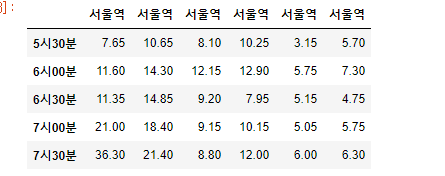

In [35]:
# 인덱스 길이
index_len = len(data_station_name.index)

station_name = set([])

# 역명 추출
for i in range(index_len):
    station_name.add(data_station_name['역명'][i])

# 역명별 평균값을 새로 생성한 데이터프레임에 추가
for j in station_name:
    station_len = len(data_station_name[data_station_name['역명']==j])
    select_data = data_station_name[data_station_name['역명']==j]
    new_data_seri = select_data.mean()
    new_data_station = new_data_station.append(new_data_seri, ignore_index=True)

# 역명'컬럼 추가
new_data_station['역명']=list(station_name)

C:\Users\Developer\AppData\Local\Temp\ipykernel_21148\2915869317.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_data_seri = select_data.mean()
C:\Users\Developer\AppData\Local\Temp\ipykernel_21148\2915869317.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data_station = new_data_station.append(new_data_seri, ignore_index=True)
C:\Users\Developer\AppData\Local\Temp\ipykernel_21148\2915869317.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_data_seri = select_data.mean()
C:\Users\Developer\AppData\Local\Temp\ipykernel_21148\2915869317.py:15

C:\Users\Developer\AppData\Local\Temp\ipykernel_21148\2915869317.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_data_seri = select_data.mean()
C:\Users\Developer\AppData\Local\Temp\ipykernel_21148\2915869317.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data_station = new_data_station.append(new_data_seri, ignore_index=True)
C:\Users\Developer\AppData\Local\Temp\ipykernel_21148\2915869317.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_data_seri = select_data.mean()
C:\Users\Developer\AppData\Local\Temp\ipykernel_21148\2915869317.py:15

In [36]:
# 인덱스명을 '역명'컬럼으로 변경
new_data_station = new_data_station.set_index('역명')

In [38]:
# 새로 생성한 데이터프레임 확인
new_data_station.head()

,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,10시00분,10시30분,11시00분,11시30분,12시00분,12시30분,13시00분,13시30분,14시00분,14시30분,15시00분,15시30분,16시00분,16시30분,17시00분,17시30분,18시00분,18시30분,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
역명,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
한양대,8.850000,9.783333,9.700000,12.150000,16.900000,23.933333,21.800000,19.383333,18.800000,15.416667,17.316667,20.866667,24.933333,22.966667,25.733333,24.300000,24.200000,23.700000,26.083333,31.050000,28.850000,27.333333,29.983333,29.250000,32.850000,34.950000,38.833333,27.400000,20.550000,20.616667,20.316667,21.116667,20.400000,23.000000,23.533333,22.083333,11.550000
춘의,20.816667,13.200000,15.683333,20.883333,26.600000,34.933333,31.350000,30.900000,25.416667,27.850000,28.250000,29.283333,31.633333,29.650000,33.633333,31.066667,32.133333,30.700000,29.900000,31.083333,33.783333,35.500000,38.700000,46.350000,40.983333,46.333333,45.350000,36.016667,29.250000,24.533333,23.450000,25.533333,20.383333,20.866667,20.816667,19.433333,14.183333
철산,28.833333,20.283333,21.750000,22.666667,31.366667,37.000000,33.416667,30.850000,27.300000,22.916667,23.000000,22.583333,23.816667,23.200000,25.233333,25.400000,24.483333,24.733333,24.133333,24.016667,27.216667,28.533333,30.566667,35.033333,35.583333,40.566667,34.033333,26.866667,21.566667,20.933333,20.433333,21.900000,19.250000,19.866667,19.250000,17.566667,11.250000
양재,4.800000,9.150000,9.283333,12.083333,16.266667,20.433333,20.250000,19.333333,18.566667,18.366667,17.483333,19.383333,21.966667,24.150000,23.350000,23.066667,21.966667,22.100000,23.733333,24.233333,24.216667,26.616667,27.550000,31.450000,28.633333,32.133333,30.116667,20.533333,16.383333,16.500000,14.783333,16.516667,14.916667,18.183333,15.016667,12.916667,7.016667
버티고개,6.433333,7.500000,7.383333,8.933333,11.900000,16.550000,14.116667,14.666667,15.066667,13.416667,14.083333,15.950000,15.933333,17.566667,19.383333,19.250000,19.416667,18.533333,19.333333,18.716667,20.200000,22.483333,24.016667,24.750000,29.116667,27.433333,25.800000,19.350000,14.900000,14.766667,13.950000,15.883333,14.616667,16.833333,17.500000,14.450000,8.966667


In [39]:
# 서울역 출퇴근길 데이터 (전처리 후)
new_data_station.loc['서울역','7시30분':'9시30분'].to_frame()

,서울역
7시30분,15.133333
8시00분,21.725000
8시30분,22.900000
9시00분,20.566667
9시30분,21.483333


In [58]:
# 서울역 출퇴근길 데이터 (전처리 전)
data.loc[data_station_name['역명'] == '서울역' ,['역명','호선','조사일자','구분','7시30분','8시00분','8시30분','9시00분','9시30분']]

,역명,호선,조사일자,구분,7시30분,8시00분,8시30분,9시00분,9시30분
0,서울역,1,평일,상선,43.3,53.6,70.9,40.4,38.0
1,서울역,1,평일,하선,29.3,27.7,19.0,18.5,15.1
224,서울역,4,평일,상선,25.3,43.0,47.4,35.2,33.2
225,서울역,4,평일,하선,17.5,23.8,24.9,16.3,17.9
568,서울역,1,토요일,상선,10.0,20.4,19.3,21.0,25.9
569,서울역,1,토요일,하선,7.6,11.7,11.1,14.8,15.1
792,서울역,4,토요일,상선,14.1,23.7,24.4,28.9,28.8
793,서울역,4,토요일,하선,9.9,11.4,14.0,16.2,18.1
1136,서울역,1,일요일,상선,7.5,14.1,12.8,14.6,18.9
1137,서울역,1,일요일,하선,4.5,7.9,7.2,10.5,11.5


데이터를 보게되면, 원본데이터의 지하철 밀집도(%)가 조건에 따라 확연한 차이를 보이고 있었다. 즉, 전처리로 같은 '역명'의 데이터의 평균값과 일부 데이터의 값 차이가 많이 나고 있어, 정규화가 필요할것으로 판단

In [41]:
# 정규화를 수행하는 함수
def normal(data):
    data = (data-data.min())/(data.max()-data.min())
    return data

# 표준화를 수행하는 함수
def standard(data):
    data = (data-data.mean())/data.std()
    return data

In [46]:
# 정규화
normal_data_station = normal(new_data_station)

In [54]:
normal_data_station.loc['서울역','7시30분':'9시30분'].to_frame()

,서울역
7시30분,0.405393
8시00분,0.414469
8시30분,0.471331
9시00분,0.427422
9시30분,0.472652


## 구분별 데이터 분석
- 상선, 하선, 내선, 외선별 복잡도 분석

In [1]:
# 데이터 전처리과정 - 데이터 정제 (Cleansing)
# seaborn을 활용한 분석
# seaborn load_dataset()
# 결측치 체크 및 처리
# 데이터 확인  - .info()
# mean() 메소드를 통해 평균값 채우기 - 결측값이 있는경우 해당
# 소수점이 너무 많은경우 - 소수점 처리 round()

In [19]:
# 행,열 위치를 변경
new_data_station = new_data_station.T
new_data_station.head()

,서울역,시청,종각,종로3가,종로5가,동대문,신설동,제기동,청량리,동묘앞,시청,을지로입구,을지로3가,을지로4가,동대문역사문화공원,신당,상왕십리,왕십리,한양대,뚝섬,성수,건대입구,구의,강변,잠실나루,잠실,신천,종합운동장,삼성,선릉,역삼,강남,교대,서초,방배,사당,낙성대,서울대입구,봉천,신림,신대방,구로디지털단지,대림,신도림,문래,영등포구청,당산,합정,홍대입구,신촌(지하),이대,아현,충정로,용답,신답,신설동,도림천,양천구청,신정네거리,용두,까치산,지축,구파발,연신내,불광,녹번,홍제,무악재,독립문,경복궁,안국,종로3가,을지로3가,충무로,동대입구,약수,금호,옥수,압구정,신사,잠원,고속터미널,교대,남부터미널,양재,매봉,도곡,대치,학여울,대청,일원,수서,가락시장,경찰병원,오금,당고개,상계,노원,창동,쌍문,수유,미아,미아삼거리,길음,성신여대입구,한성대입구,혜화,동대문,동대문역사문화공원,충무로,명동,회현,서울역,숙대입구,삼각지,신용산,이촌,동작,총신대입구,사당,남태령,방화,개화산,김포공항,송정,마곡,발산,우장산,화곡,까치산,신정,목동,오목교,양평,영등포구청,영등포시장,신길,여의도,여의나루,마포,공덕,애오개,충정로,서대문,광화문,종로3가,을지로4가,동대문역사문화공원,청구,신금호,행당,왕십리,마장,답십리,장한평,군자,아차산,광나루,천호,강동,길동,굽은다리,명일,고덕,상일동,둔촌동,올림픽공원(한국체대),방이,오금,개롱,거여,마천,강일,미사,하남풍산,하남시청,하남검단산,응암,역촌,불광,독바위,연신내,구산,새절,증산,디지털미디어시티,월드컵경기장,마포구청,망원,합정,상수,광흥창,대흥,공덕,효창공원앞,삼각지,녹사평,이태원,한강진,버티고개,약수,청구,신당,동묘앞,창신,보문,안암,고려대,월곡,상월곡,돌곶이,석계,태릉입구,화랑대,봉화산,신내,장암,도봉산,수락산,마들,노원,중계,하계,공릉,태릉입구,먹골,중화,상봉,면목,사가정,용마산,중곡,군자,어린이대공원,건대입구,뚝섬유원지,청담,강남구청,학동,논현,반포,고속터미널,내방,총신대입구,남성,숭실대입구,상도,장승배기,신대방삼거리,보라매,신풍,대림,남구로,가산디지털단지,철산,광명사거리,천왕,온수,까치울,부천종합운동장,춘의,신중동,부천시청,상동,삼산체육관,굴포천,부평구청,암사,천호,강동구청,몽촌토성,잠실,석촌,송파,가락시장,문정,장지,복정,산성,남한산성입구,단대오거리,신흥,수진,모란,서울역,시청,종각,종로3가,종로5가,동대문,신설동,제기동,청량리,동묘앞,시청,을지로입구,을지로3가,을지로4가,동대문역사문화공원,신당,상왕십리,왕십리,한양대,뚝섬,성수,건대입구,구의,강변,잠실나루,잠실,신천,종합운동장,삼성,선릉,역삼,강남,교대,서초,방배,사당,낙성대,서울대입구,봉천,신림,신대방,구로디지털단지,대림,신도림,문래,영등포구청,당산,합정,홍대입구,신촌(지하),이대,아현,충정로,용답,신답,신설동,도림천,양천구청,신정네거리,용두,까치산,지축,구파발,연신내,불광,녹번,홍제,무악재,독립문,경복궁,안국,종로3가,을지로3가,충무로,동대입구,약수,금호,옥수,압구정,신사,잠원,고속터미널,교대,남부터미널,양재,매봉,도곡,대치,학여울,대청,일원,수서,가락시장,경찰병원,오금,당고개,상계,노원,창동,쌍문,수유,미아,미아삼거리,길음,성신여대입구,한성대입구,혜화,동대문,동대문역사문화공원,충무로,명동,회현,서울역,숙대입구,삼각지,신용산,이촌,동작,총신대입구,사당,남태령,방화,개화산,김포공항,송정,마곡,발산,우장산,화곡,까치산,신정,목동,오목교,양평,영등포구청,영등포시장,신길,여의도,여의나루,마포,공덕,애오개,충정로,서대문,광화문,종로3가,을지로4가,동대문역사문화공원,청구,신금호,행당,왕십리,마장,답십리,장한평,군자,아차산,광나루,천호,강동,길동,굽은다리,명일,고덕,상일동,둔촌동,올림픽공원(한국체대),방이,오금,개롱,거여,마천,강일,미사,하남풍산,하남시청,하남검단산,응암,역촌,불광,독바위,연신내,구산,새절,증산,디지털미디어시티,월드컵경기장,마포구청,망원,합정,상수,광흥창,대흥,공덕,효창공원앞,삼각지,녹사평,이태원,한강진,버티고개,약수,청구,신당,동묘앞,창신,보문,안암,고려대,월곡,상월곡,돌곶이,석계,태릉입구,화랑대,봉화산,신내,장암,도봉산,수락산,마들,노원,중계,하계,공릉,태릉입구,먹골,중화,상봉,면목,사가정,용마산,중곡,군자,어린이대공원,건대입구,뚝섬유원지,청담,강남구청,학동,논현,반포,고속터미널,내방,총신대입구,남성,숭실대입구,상도,장승배기,신대방삼거리,보라매,신풍,대림,남구로,가산디지털단지,철산,광명사거리,천왕,온수,까치울,부천종합운동장,춘의,신중동,부천시청,상동,삼산체육관,굴포천,부평구청,암사,천호,강동구청,몽촌토성,잠실,석촌,송파,가락시장,문정,장지,복정,산성,남한산성입구,단대오거리,신흥,수진,모란,서울역,시청,종각,종로3가,종로5가,동대문,신설동,제기동,청량리,동묘앞,시청,을지로입구,을지로3가,을지로4가,동대문역사문화공원,신당,상왕십리,왕십리,한양대,뚝섬,성수,건대입구,구의,강변,잠실나루,잠실,신천,종합운동장,삼성,선릉,역삼,강남,교대,서초,방배,사당,낙성대,서울대입구,봉천,신림,신대방,구로디지털단지,대림,신도림,문래,영등포구청,당산,합정,홍대입구,신촌(지하),이대,아현,충정로,용답,신답,신설동,도림천,양천구청,신정네거리,용두,까치산,지축,구파발,연신내,불광,녹번,홍제,무악재,독립문,경복궁,안국,종로3가,을지로3가,충무로,동대입구,약수,금호,옥수,압구정,신사,잠원,고속터미널,교대,남부터미널,양재,매봉,도곡,대치,학여울,대청,일원,수서,가락시장,경찰병원,오금,당고개,상계,노원,창동,쌍문,수유,미아,미아삼거리,길음,성신여대입구,한성대입구,혜화,동대문,동대문역사문화공원,충무로,명동,회현,서울역,숙대입구,삼각지,신용산,이촌,동작,총신대입구,사당,남태령,방화,개화산,김포공항,송정,마곡,발산,우장산,화곡,까치산,신정,목동,오목교,양평,영등포구청,영등포시장,신길,여의도,여의나루,마포,공덕,애오개,충정로,서대문,광화문,종로3가,을지로4가,동대문역사문화공원,청구,신금호,행당,왕십리,마장,답십리,장한평,군자,아차산,광나루,천호,강동,길동,굽은다리,명일,고덕,상일동,둔촌동,올림픽공원(한국체대),방이,오금,개롱,거여,마천,강일,미사,하남풍산,하남시청,하남검단산,응암,역촌,불광,독바위,연신내,구산,새절,증산,디지털미디어시티,월드컵경기장,마포구청,망원,합정,상수,광흥창,대흥,공덕,효창공원앞,삼각지,녹사평,이태원,한강진,버티고개,약수,청구,신당,동묘앞,창신,보문,안암,고려대,월곡,상월곡,돌곶이,석계,태릉입구,화랑대,봉화산,신내,장암,도봉산,수락산,마들,노원,중계,하계,공릉,태릉입구,먹골,중화,상봉,면목,사가정,용마산,중곡,군자,어린이대공원,건대입구,뚝섬유원지,청담,강남구청,학동,논현,반포,고속터미널,내방,총신대입구,남성,숭실대입구,상도,장승배기,신대방삼거리,보라매,신풍,대림,남구로,가산디지털단지,철산,광명사거리,천왕,온수,까치울,부천종합운동장,춘의,신중동,부천시청,상동,삼산체육관,굴포천,부평구청,암사,천호,강동구청,몽촌토성,잠실,석촌,송파,가락시장,문정,장지,복정,산성,남한산성입구,단대오거리,신흥,수진,모란
5시30분,7.65,6.20,6.50,6.95,7.55,8.20,11.25,11.25,10.65,7.65,12.40,9.20,11.35,12.70,15.60,16.65,16.65,14.80,12.60,11.15,7.25,17.65,19.05,16.65,16.30,17.85,20.7,18.95,13.45,22.05,33.90,36.70,43.15,43.75,45.35,45.00,42.45,37.3,40.05,42.05,40.40,46.25,51.95,20.45,22.60,22.55,20.20,19.40,14.85,14.85,14.85,13.75,12.90,9.45,7.50,3.75,15.10,15.60,13.75,6.25,4.90,24.35,17.15,21.60,23.75,24.50,25.80,24.05,18.10,18.10,18.30,16.40,12.15,12.20,11.80,14.95,16.15,18.9,10.55,10.10,10.40,11.20,13.65,12.00,6.3,6.35,5.90,5.75,5.85,6.00,5.50,5.10,4.05,2.75,2.25,2.05,5.60,6.15,7.40,12.20,31.90,32.50,37.10,42.50,37.45,31.

In [20]:
new_data_station.describe()

,서울역,시청,종각,종로3가,종로5가,동대문,신설동,제기동,청량리,동묘앞,시청,을지로입구,을지로3가,을지로4가,동대문역사문화공원,신당,상왕십리,왕십리,한양대,뚝섬,성수,건대입구,구의,강변,잠실나루,잠실,신천,종합운동장,삼성,선릉,역삼,강남,교대,서초,방배,사당,낙성대,서울대입구,봉천,신림,신대방,구로디지털단지,대림,신도림,문래,영등포구청,당산,합정,홍대입구,신촌(지하),이대,아현,충정로,용답,신답,신설동,도림천,양천구청,신정네거리,용두,까치산,지축,구파발,연신내,불광,녹번,홍제,무악재,독립문,경복궁,안국,종로3가,을지로3가,충무로,동대입구,약수,금호,옥수,압구정,신사,잠원,고속터미널,교대,남부터미널,양재,매봉,도곡,대치,학여울,대청,일원,수서,가락시장,경찰병원,오금,당고개,상계,노원,창동,쌍문,수유,미아,미아삼거리,길음,성신여대입구,한성대입구,혜화,동대문,동대문역사문화공원,충무로,명동,회현,서울역,숙대입구,삼각지,신용산,이촌,동작,총신대입구,사당,남태령,방화,개화산,김포공항,송정,마곡,발산,우장산,화곡,까치산,신정,목동,오목교,양평,영등포구청,영등포시장,신길,여의도,여의나루,마포,공덕,애오개,충정로,서대문,광화문,종로3가,을지로4가,동대문역사문화공원,청구,신금호,행당,왕십리,마장,답십리,장한평,군자,아차산,광나루,천호,강동,길동,굽은다리,명일,고덕,상일동,둔촌동,올림픽공원(한국체대),방이,오금,개롱,거여,마천,강일,미사,하남풍산,하남시청,하남검단산,응암,역촌,불광,독바위,연신내,구산,새절,증산,디지털미디어시티,월드컵경기장,마포구청,망원,합정,상수,광흥창,대흥,공덕,효창공원앞,삼각지,녹사평,이태원,한강진,버티고개,약수,청구,신당,동묘앞,창신,보문,안암,고려대,월곡,상월곡,돌곶이,석계,태릉입구,화랑대,봉화산,신내,장암,도봉산,수락산,마들,노원,중계,하계,공릉,태릉입구,먹골,중화,상봉,면목,사가정,용마산,중곡,군자,어린이대공원,건대입구,뚝섬유원지,청담,강남구청,학동,논현,반포,고속터미널,내방,총신대입구,남성,숭실대입구,상도,장승배기,신대방삼거리,보라매,신풍,대림,남구로,가산디지털단지,철산,광명사거리,천왕,온수,까치울,부천종합운동장,춘의,신중동,부천시청,상동,삼산체육관,굴포천,부평구청,암사,천호,강동구청,몽촌토성,잠실,석촌,송파,가락시장,문정,장지,복정,산성,남한산성입구,단대오거리,신흥,수진,모란,서울역,시청,종각,종로3가,종로5가,동대문,신설동,제기동,청량리,동묘앞,시청,을지로입구,을지로3가,을지로4가,동대문역사문화공원,신당,상왕십리,왕십리,한양대,뚝섬,성수,건대입구,구의,강변,잠실나루,잠실,신천,종합운동장,삼성,선릉,역삼,강남,교대,서초,방배,사당,낙성대,서울대입구,봉천,신림,신대방,구로디지털단지,대림,신도림,문래,영등포구청,당산,합정,홍대입구,신촌(지하),이대,아현,충정로,용답,신답,신설동,도림천,양천구청,신정네거리,용두,까치산,지축,구파발,연신내,불광,녹번,홍제,무악재,독립문,경복궁,안국,종로3가,을지로3가,충무로,동대입구,약수,금호,옥수,압구정,신사,잠원,고속터미널,교대,남부터미널,양재,매봉,도곡,대치,학여울,대청,일원,수서,가락시장,경찰병원,오금,당고개,상계,노원,창동,쌍문,수유,미아,미아삼거리,길음,성신여대입구,한성대입구,혜화,동대문,동대문역사문화공원,충무로,명동,회현,서울역,숙대입구,삼각지,신용산,이촌,동작,총신대입구,사당,남태령,방화,개화산,김포공항,송정,마곡,발산,우장산,화곡,까치산,신정,목동,오목교,양평,영등포구청,영등포시장,신길,여의도,여의나루,마포,공덕,애오개,충정로,서대문,광화문,종로3가,을지로4가,동대문역사문화공원,청구,신금호,행당,왕십리,마장,답십리,장한평,군자,아차산,광나루,천호,강동,길동,굽은다리,명일,고덕,상일동,둔촌동,올림픽공원(한국체대),방이,오금,개롱,거여,마천,강일,미사,하남풍산,하남시청,하남검단산,응암,역촌,불광,독바위,연신내,구산,새절,증산,디지털미디어시티,월드컵경기장,마포구청,망원,합정,상수,광흥창,대흥,공덕,효창공원앞,삼각지,녹사평,이태원,한강진,버티고개,약수,청구,신당,동묘앞,창신,보문,안암,고려대,월곡,상월곡,돌곶이,석계,태릉입구,화랑대,봉화산,신내,장암,도봉산,수락산,마들,노원,중계,하계,공릉,태릉입구,먹골,중화,상봉,면목,사가정,용마산,중곡,군자,어린이대공원,건대입구,뚝섬유원지,청담,강남구청,학동,논현,반포,고속터미널,내방,총신대입구,남성,숭실대입구,상도,장승배기,신대방삼거리,보라매,신풍,대림,남구로,가산디지털단지,철산,광명사거리,천왕,온수,까치울,부천종합운동장,춘의,신중동,부천시청,상동,삼산체육관,굴포천,부평구청,암사,천호,강동구청,몽촌토성,잠실,석촌,송파,가락시장,문정,장지,복정,산성,남한산성입구,단대오거리,신흥,수진,모란,서울역,시청,종각,종로3가,종로5가,동대문,신설동,제기동,청량리,동묘앞,시청,을지로입구,을지로3가,을지로4가,동대문역사문화공원,신당,상왕십리,왕십리,한양대,뚝섬,성수,건대입구,구의,강변,잠실나루,잠실,신천,종합운동장,삼성,선릉,역삼,강남,교대,서초,방배,사당,낙성대,서울대입구,봉천,신림,신대방,구로디지털단지,대림,신도림,문래,영등포구청,당산,합정,홍대입구,신촌(지하),이대,아현,충정로,용답,신답,신설동,도림천,양천구청,신정네거리,용두,까치산,지축,구파발,연신내,불광,녹번,홍제,무악재,독립문,경복궁,안국,종로3가,을지로3가,충무로,동대입구,약수,금호,옥수,압구정,신사,잠원,고속터미널,교대,남부터미널,양재,매봉,도곡,대치,학여울,대청,일원,수서,가락시장,경찰병원,오금,당고개,상계,노원,창동,쌍문,수유,미아,미아삼거리,길음,성신여대입구,한성대입구,혜화,동대문,동대문역사문화공원,충무로,명동,회현,서울역,숙대입구,삼각지,신용산,이촌,동작,총신대입구,사당,남태령,방화,개화산,김포공항,송정,마곡,발산,우장산,화곡,까치산,신정,목동,오목교,양평,영등포구청,영등포시장,신길,여의도,여의나루,마포,공덕,애오개,충정로,서대문,광화문,종로3가,을지로4가,동대문역사문화공원,청구,신금호,행당,왕십리,마장,답십리,장한평,군자,아차산,광나루,천호,강동,길동,굽은다리,명일,고덕,상일동,둔촌동,올림픽공원(한국체대),방이,오금,개롱,거여,마천,강일,미사,하남풍산,하남시청,하남검단산,응암,역촌,불광,독바위,연신내,구산,새절,증산,디지털미디어시티,월드컵경기장,마포구청,망원,합정,상수,광흥창,대흥,공덕,효창공원앞,삼각지,녹사평,이태원,한강진,버티고개,약수,청구,신당,동묘앞,창신,보문,안암,고려대,월곡,상월곡,돌곶이,석계,태릉입구,화랑대,봉화산,신내,장암,도봉산,수락산,마들,노원,중계,하계,공릉,태릉입구,먹골,중화,상봉,면목,사가정,용마산,중곡,군자,어린이대공원,건대입구,뚝섬유원지,청담,강남구청,학동,논현,반포,고속터미널,내방,총신대입구,남성,숭실대입구,상도,장승배기,신대방삼거리,보라매,신풍,대림,남구로,가산디지털단지,철산,광명사거리,천왕,온수,까치울,부천종합운동장,춘의,신중동,부천시청,상동,삼산체육관,굴포천,부평구청,암사,천호,강동구청,몽촌토성,잠실,석촌,송파,가락시장,문정,장지,복정,산성,남한산성입구,단대오거리,신흥,수진,모란
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.00000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,3

In [58]:
plot = new_data_station['서울역'].plot()
plot.set_xlabel("시간")
plot.set_ylabel("복잡도")
plt.title("시간별 철도 복잡도")
plt.show()

KeyError: '서울역'

data

### 역별 데이터 전환후 요약정보 확인

## 평일 1호선 상선 데이터
- 1호선 상

In [7]:
train_1 = data_clean[(data_clean['호선'] == 1) & (data_clean['구분'] == 0) & (data_clean['조사일자'] == '평일')]
train_1

,조사일자,호선,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
0,평일,1,서울역,0,6.2,14.6,13.4,26.8,43.3,53.6,...,20.0,15.1,11.1,12.0,12.5,10.1,10.4,16.4,7.8,6.1
2,평일,1,시청,0,5.4,10.1,13.0,20.8,32.0,40.6,...,24.1,17.4,13.7,14.5,15.8,12.1,14.5,18.3,11.7,11.7
4,평일,1,종각,0,5.2,10.8,9.3,13.6,19.6,25.5,...,28.8,20.2,19.1,18.7,22.2,16.1,21.8,25.1,16.3,14.8
6,평일,1,종로3가,0,4.8,9.8,9.0,12.9,20.4,30.8,...,29.6,22.2,21.0,18.9,26.1,18.3,22.8,29.0,18.2,16.6
8,평일,1,종로5가,0,4.3,7.9,7.4,9.9,15.6,22.2,...,34.3,22.8,21.5,21.9,27.8,22.4,20.8,29.8,18.7,16.7
10,평일,1,동대문,0,5.9,8.0,6.9,9.3,14.7,18.5,...,34.4,22.5,25.0,19.2,25.7,24.8,24.2,23.6,19.0,16.7
12,평일,1,신설동,0,5.3,9.0,5.0,6.7,10.1,13.0,...,34.9,20.3,21.5,16.0,27.0,19.7,23.8,26.6,22.7,13.5
14,평일,1,제기동,0,5.9,7.7,4.5,5.7,8.6,11.1,...,36.1,19.9,20.1,16.6,26.0,19.2,22.6,24.6,21.4,12.7
16,평일,1,청량리,0,5.1,4.0,3.3,4.8,6.7,8.6,...,31.8,17.9,18.8,15.0,21.2,17.3,20.0,22.0,19.3,11.1
18,평일,1,동묘앞,0,5.1,10.1,5.6,7.7,12.9,16.4,...,32.5,21.7,22.8,17.6,24.3,21.0,18.0,27.6,21.9,15.4


In [8]:
# 필요 없는 변수 '호선','역명', '구분' 제거
train_1 = train_1.drop(columns = ['호선', '구분' , '조사일자'], axis = 1)

In [9]:
train_1 = train_1.set_index("역명")

In [10]:
train_1.head()

,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,10시00분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
역명,,,,,,,,,,,,,,,,,,,,,
서울역,6.2,14.6,13.4,26.8,43.3,53.6,70.9,40.4,38.0,26.6,...,20.0,15.1,11.1,12.0,12.5,10.1,10.4,16.4,7.8,6.1
시청,5.4,10.1,13.0,20.8,32.0,40.6,50.9,30.8,35.8,20.2,...,24.1,17.4,13.7,14.5,15.8,12.1,14.5,18.3,11.7,11.7
종각,5.2,10.8,9.3,13.6,19.6,25.5,26.5,19.2,26.2,17.0,...,28.8,20.2,19.1,18.7,22.2,16.1,21.8,25.1,16.3,14.8
종로3가,4.8,9.8,9.0,12.9,20.4,30.8,25.5,18.9,23.6,19.7,...,29.6,22.2,21.0,18.9,26.1,18.3,22.8,29.0,18.2,16.6
종로5가,4.3,7.9,7.4,9.9,15.6,22.2,16.7,16.5,15.8,18.7,...,34.3,22.8,21.5,21.9,27.8,22.4,20.8,29.8,18.7,16.7


In [12]:
train_1_T = train_1.transpose()
train_1_T.head()

역명,서울역,시청,종각,종로3가,종로5가,동대문,신설동,제기동,청량리,동묘앞
5시30분,6.2,5.4,5.2,4.8,4.3,5.9,5.3,5.9,5.1,5.1
6시00분,14.6,10.1,10.8,9.8,7.9,8.0,9.0,7.7,4.0,10.1
6시30분,13.4,13.0,9.3,9.0,7.4,6.9,5.0,4.5,3.3,5.6
7시00분,26.8,20.8,13.6,12.9,9.9,9.3,6.7,5.7,4.8,7.7
7시30분,43.3,32.0,19.6,20.4,15.6,14.7,10.1,8.6,6.7,12.9


In [14]:
# 통계정보 확인하기
# 수치형 변수의 데이터 정보를 요약하여 출력합니다.
# mean은 평균, std는 표준편차를 나타냅니다. 
train_1.describe()

,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,10시00분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.0000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000
mean,5.320000,9.200000,7.740000,11.820000,18.390000,24.030000,25.890000,17.790000,20.880000,16.590000,...,30.650000,20.0000,19.460000,17.040000,22.860000,18.100000,19.89000,24.300000,17.700000,13.530000
std,0.565292,2.711293,3.445512,7.065849,11.372525,14.204933,19.812872,10.515856,9.703814,5.397211,...,5.171987,2.5197,4.171118,2.830469,5.081601,4.475116,4.43282,4.389887,4.688046,3.329681
min,4.300000,4.000000,3.300000,4.800000,6.700000,8.600000,8.800000,6.600000,10.100000,7.300000,...,20.000000,15.1000,11.100000,12.000000,12.500000,10.100000,10.40000,16.400000,7.800000,6.100000
25%,5.100000,7.925000,5.150000,6.950000,10.800000,13.850000,14.600000,10.825000,14.825000,14.025000,...,29.000000,18.4000,18.875000,15.250000,21.450000,16.400000,18.50000,22.400000,16.775000,11.950000
50%,5.250000,9.400000,7.150000,9.600000,15.150000,20.350000,17.250000,15.700000,16.200000,17.100000,...,32.150000,20.2500,20.550000,17.100000,25.000000,18.750000,21.30000,24.850000,18.850000,14.150000
75%,5.775000,10.100000,9.225000,13.425000,20.200000,29.475000,26.250000,19.125000,25.550000,19.450000,...,34.375000,22.0750,21.500000,18.850000,26.075000,20.675000,22.75000,27.350000,20.875000,16.300000
max,6.200000,14.600000,13.400000,26.800000,43.300000,53.600000,70.900000,40.400000,38.000000,26.600000,...,36.100000,22.8000,25.000000,21.900000,27.800000,24.800000,24.20000,29.800000,22.700000,16.700000


In [13]:
# 수치형 변수의 데이터 정보를 요약하여 출력합니다.
# mean은 평균, std는 표준편차를 나타냅니다. 
train_1_T.describe()

역명,서울역,시청,종각,종로3가,종로5가,동대문,신설동,제기동,청량리,동묘앞
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,22.402703,21.867568,21.648649,23.481081,22.451351,22.518919,20.613514,18.754054,16.113514,20.854054
std,13.178865,9.524881,8.320010,9.591919,10.974684,11.300463,10.624870,11.023853,10.076297,10.398360
min,6.100000,5.400000,5.200000,4.800000,4.300000,5.900000,5.000000,4.500000,3.300000,5.100000
25%,14.600000,15.800000,18.400000,18.900000,16.500000,16.700000,13.700000,11.600000,9.000000,15.200000
50%,20.000000,20.300000,21.000000,22.800000,21.900000,20.600000,19.800000,17.200000,14.900000,20.000000
75%,26.600000,24.100000,23.800000,26.100000,25.300000,25.700000,23.800000,22.000000,20.400000,23.700000
max,70.900000,50.900000,54.500000,57.500000,60.400000,59.800000,53.800000,53.100000,46.500000,55.100000


In [43]:
train_1_T.shape

(37, 10)

## 3. 데이터 시각화

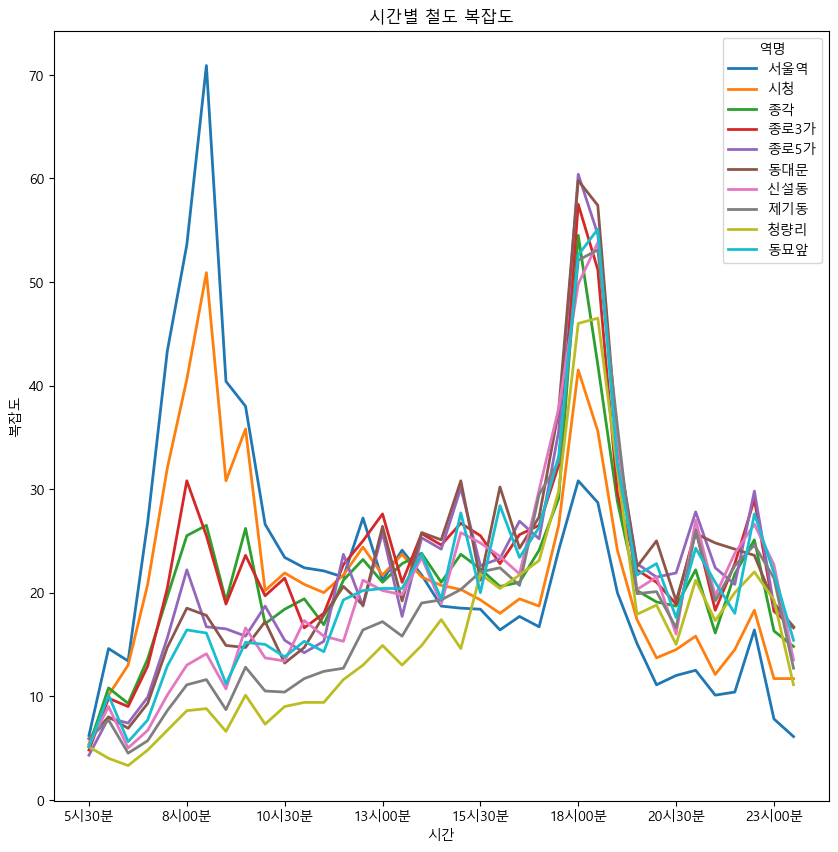

In [45]:
# 
plot = train_1_T.plot()
plot.set_xlabel("시간")
plot.set_ylabel("복잡도")
plt.title("시간별 철도 복잡도")
plt.show()

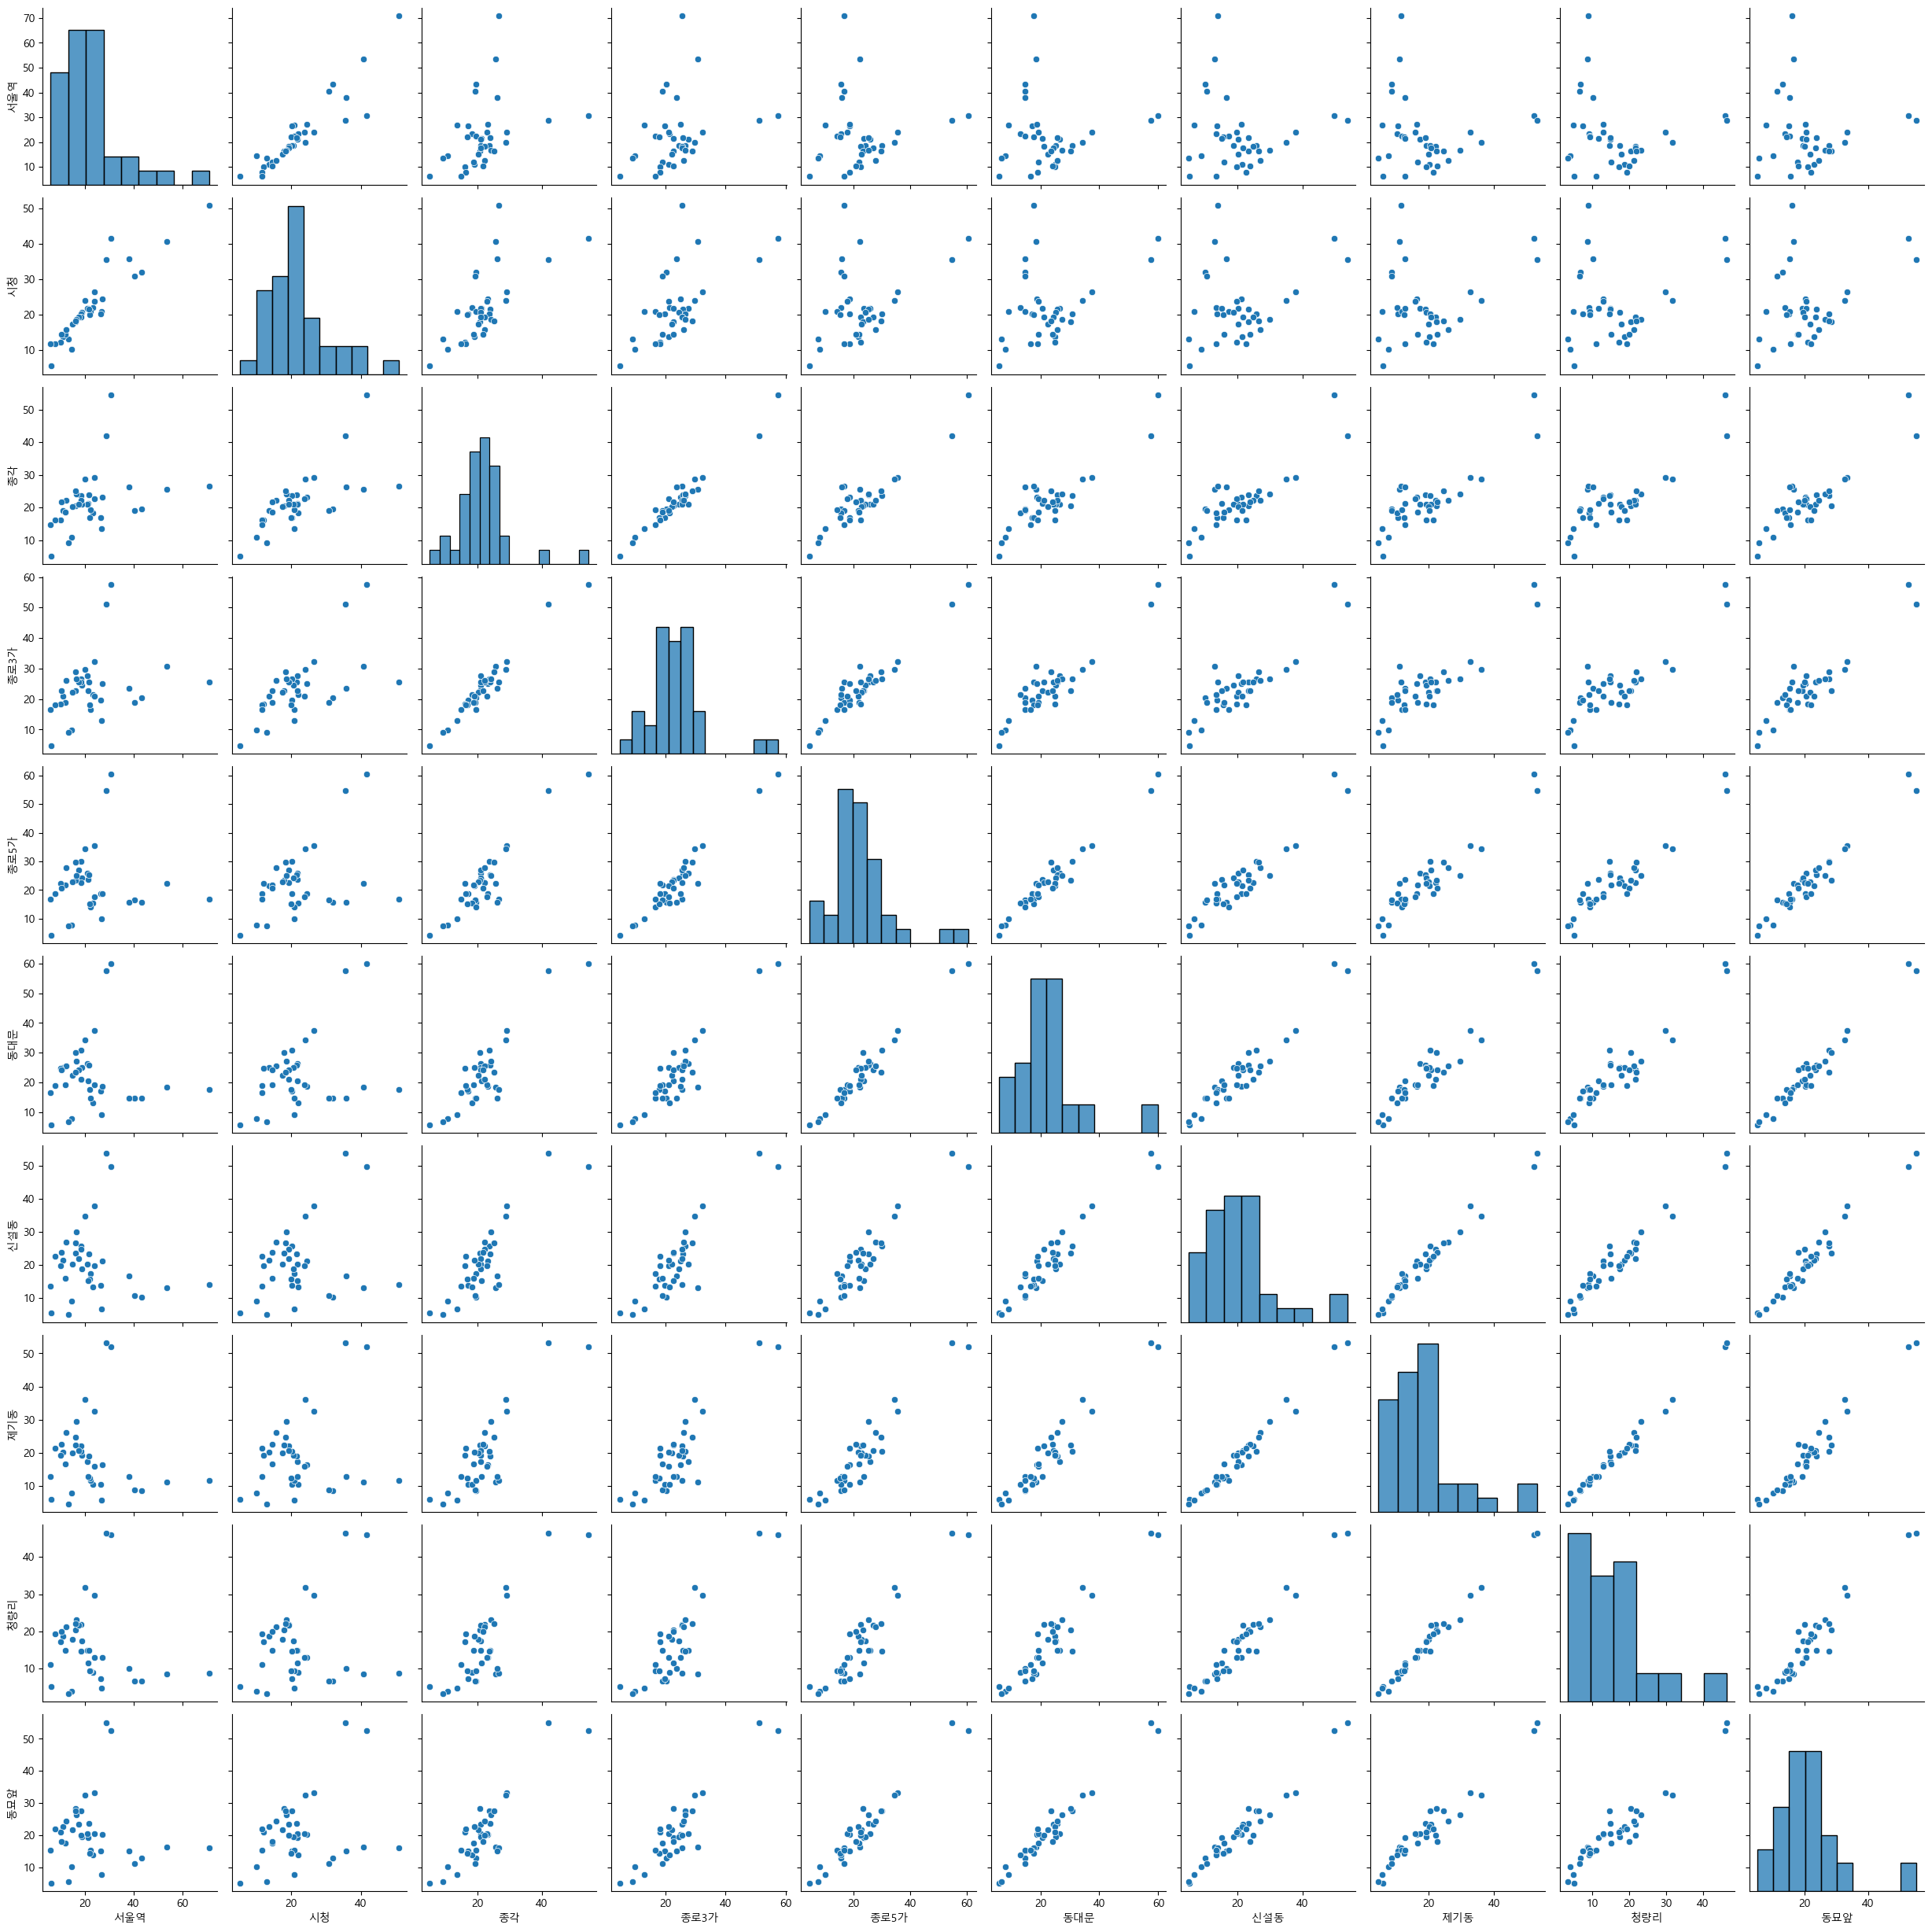

In [44]:
#seaborn의 pairplot()을 사용해서 컬럼끼리 비교
sns.pairplot(train_1_T)

G:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

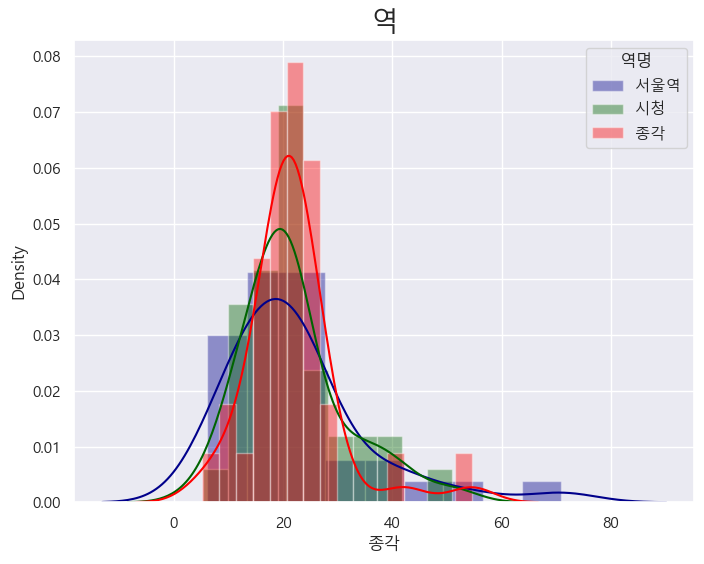

In [70]:
# 그래프의 사이즈를 설정합니다.
# subplots는 한 번에 여러 그래프를 보여주기 위해서 사용합니다. 
# subplots()에선 두개의 값을 받을 수 있는데 figure와 axes 값을 받을 수 있습니다. 여기서 변수명은 상관없습니다. 순서가 중요합니다.
# fig란 figure로써  전체 subplot을 말합니다. 몇개의 그래프가 있던지 상관없이 그것을 담는 그릇이라고 생각하면 됩니다. 전체 사이즈를 말합니다.
# ax는 axe로써 각각의 그래프를 말합니다. 
# figsize(가로, 세로)로 크기를 정합니다. 
fig, ax = plt.subplots(figsize=(8, 6))

# seborn 그래프의 스타일을 설정합니다.
# style에 white, whitegrid, dark 등을 넣어서 스타일을 바꿀 수 있습니다.
sns.set(style='darkgrid')

# 59번 데이터의 분포를 출력합니다.
# displot로 분포도를 그립니다. 
# yellow, green와 같은 색깔을 넣습니다. 
# 위 나누어 출력 했던 그래프를 한번에 출력합니다.
sns.distplot(train_1_T['서울역'], color = 'darkblue', label='서울역')
sns.distplot(train_1_T['시청'], color = 'darkgreen', label='시청')
sns.distplot(train_1_T['종각'],  color = 'red', label='종각')

# seaborn 한글 깨짐 현상으로 폰트 적용
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프의 제목을 설정합니다. 
plt.legend(title='역명')
plt.title('역', fontsize = 20)
plt.show()